# Markov Chain Analysis

##### import the libraries

In [2]:
import numpy as np
import random
import networkx as nx
import scipy.linalg

##### creating synthetic data for poc purposes

In [3]:
# synthetically creating data
nodes = list(range(1, 5))

# using pairs to create graph
pairs = []
for i in range(25*len(nodes)):
    idx1 = random.randrange(1, len(nodes)+1)
    idx2 = random.randrange(1, len(nodes)+1)
    pair = (idx1, idx2)
    pairs.append(pair)

##### Creating graph with weighted edges

In [4]:
def create_weighted_graph(nodes, pairs):
    edges_dict = dict.fromkeys(pairs, 0.)
    node_dict = dict.fromkeys(nodes, 0.)

    # create dictionary for edge counts
    for k in edges_dict.keys():
        for edge in pairs:
            if k == edge:
                edges_dict[k] += 1

    # defining edge counts by node
    for k, v in edges_dict.items():
        for i in node_dict.keys():
            if k[0] == i:
                node_dict[i] += v

    # edges_dict containing frequencies, rows should add to 1
    for k, v in edges_dict.items():
        for i, j in node_dict.items():
            if k[0] == i:
                edges_dict[k] =  v / j

    # converting edges_dict to weights list
    weights = []
    for k, v in edges_dict.items(): 
        v = (v,)
        weights.append(k + v) # adding tuples to create three-tuple

    # initialize directed graph object
    transition_matrix = nx.DiGraph()
    transition_matrix.add_nodes_from(nodes)
    transition_matrix.add_weighted_edges_from(weights)

    return transition_matrix

def visualize_directed_graph(nodes, pairs):
    edges_dict = dict.fromkeys(pairs, 0.)
    node_dict = dict.fromkeys(nodes, 0.)

    # create dictionary for edge counts
    for k in edges_dict.keys():
        for edge in pairs:
            if k == edge:
                edges_dict[k] += 1

    # defining edge counts by node
    for k, v in edges_dict.items():
        for i in node_dict.keys():
            if k[0] == i:
                node_dict[i] += v

    # edges_dict containing frequencies, rows should add to 1
    for k, v in edges_dict.items():
        for i, j in node_dict.items():
            if k[0] == i:
                edges_dict[k] =  v / j

    # creating weights list for pretty viz
    weights_rounded = []
    for k, v in edges_dict.items():
        v = (round(v, 1),)
        weights_rounded.append(k+v)

    matrix_pretty = nx.DiGraph()
    matrix_pretty.add_nodes_from(nodes)
    matrix_pretty.add_weighted_edges_from(weights_rounded)

    # graph
    pos=nx.spring_layout(matrix_pretty)
    nx.draw_networkx(matrix_pretty,pos)
    labels = nx.get_edge_attributes(matrix_pretty,'weight')
    nx.draw_networkx_edge_labels(matrix_pretty,pos,edge_labels=labels)
    

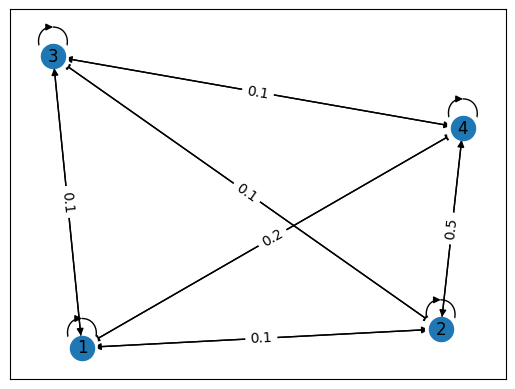

In [5]:
visualize_directed_graph(nodes, pairs)

### Time for the cool stuff!

In [6]:
P = create_weighted_graph(nodes, pairs)

In [7]:
# convert P to numpy array
P = nx.to_numpy_array(P, nodelist=nodes)

## Random Walk

In [8]:
n = 10
start_state = 0 # example, start at login page if login state = 0
print(nodes[start_state], "--->", end=" ")
prev_state=start_state
l = [i for i in range(len(nodes))]

while n-1:
    curr_state = np.random.choice(l, p=P[prev_state])
    print(nodes[curr_state], "--->", end=" ")
    prev_state=curr_state
    n -= 1
print("stop")

1 ---> 3 ---> 3 ---> 1 ---> 1 ---> 1 ---> 3 ---> 3 ---> 2 ---> 3 ---> stop


# Finding Steady State Vector (3 methods)

## Monte Carlo Method

In [9]:
steps = 10**4
start_state= 0 
pi = np.zeros(len(nodes))
pi[start_state] = 1
prev_state = start_state
l = [i for i in range(len(nodes))]

i = 0
while i < steps:
    curr_state = np.random.choice(l, p=P[prev_state])
    pi[curr_state] += 1
    prev_state = curr_state
    i += 1
print("pi=", pi/steps)

pi= [0.1798 0.2995 0.2572 0.2636]


## Matrix Multiplication

In [10]:
steps = 10**3
A_n = P
i=0
while i < steps:
    A_n = np.matmul(A_n, P)
    i += 1
print("A_n = \n", A_n, "\n")
print("pi = ", A_n[0])

A_n = 
 [[0.1795666  0.29677881 0.25131776 0.27233683]
 [0.1795666  0.29677881 0.25131776 0.27233683]
 [0.1795666  0.29677881 0.25131776 0.27233683]
 [0.1795666  0.29677881 0.25131776 0.27233683]] 

pi =  [0.1795666  0.29677881 0.25131776 0.27233683]


## Finding Left Eigenvectors

In [11]:
values, left = scipy.linalg.eig(P, right=False, left=True)
print("left eigen vectors: \n", left)
print("eigenvalues: ", values)

left eigen vectors: 
 [[-0.35376159 -0.24172806 -0.65507059 -0.06310015]
 [-0.58467967 -0.68254659 -0.30998441 -0.50556537]
 [-0.4951175   0.30632353  0.55007971  0.82226017]
 [-0.53652687  0.61795112  0.4149753  -0.25359464]]
eigenvalues:  [ 1.        +0.j -0.16007243+0.j  0.01774738+0.j  0.26762645+0.j]


In [12]:
pi = left[:, 0]
pi_norm = [(x/np.sum(pi)).real for x in pi]
pi_norm

[0.17956660376130645,
 0.29677881173944165,
 0.25131775883386476,
 0.2723368256653871]

#### Each one of these last three methods will give approximately similar answers for the steady state vector.